# Import libraries

In [ ]:
from tqdm import tqdm
import pandas as pd
import json
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt

# Load subject data

Import cleaned human data (i.e. removing users whose data did not pass some quality checks) as a dataframe. Each row of this dataframe corresponds to one action made by one player. Columns contain information about the player, the game state, and the identity and timing of their action.

In [ ]:
import pandas as pd
import requests
from io import BytesIO

url = 'https://drive.google.com/uc?export=download&id=1joV9gsHPk1hOBWj5gHcVzeMZyptGhwow'
r = requests.get(url) # Use requests to download the file
r.raise_for_status()  # Raises a HTTPError if the http request returned an unsuccessful status code.

df = pd.read_parquet(BytesIO(r.content)) # Read the content of the file into a pandas DataFrame

print(str(df['device_ID'].nunique()) + ' unique devices') # number of unique users

df



3801 unique devices


,device_ID,session_start,time,sw_flip,sw_offset,sw_subwave_num,sw_number,device_ID_rand,device_ID_time,mo_y,...,prev_rank,top,top_prev,puzzle_attempt,cum_score,trial_score,cum_score_s6,cum_score_last_6,threshold_puzzle,first_threshold
0,0012e848890bbcb5,522282,531464,False,4.0,2.0,1.0,3.293069e+09,1.608241e+09,-121.111099,...,NaN,10.0,first,1,0.0,0.0,NaN,NaN,False,14.0
1,0012e848890bbcb5,522282,533139,False,4.0,2.0,1.0,3.293069e+09,1.608241e+09,82.777802,...,NaN,10.0,other,1,0.0,0.0,NaN,NaN,False,14.0
2,0012e848890bbcb5,522282,534881,False,4.0,2.0,1.0,3.293069e+09,1.608241e+09,-87.222214,...,NaN,10.0,other,1,0.0,0.0,NaN,NaN,False,14.0
3,0012e848890bbcb5,522282,540839,False,4.0,5.0,2.0,3.293069e+09,1.608241e+09,127.222229,...,10.0,other,10.0,2,0.0,0.0,NaN,NaN,False,14.0
4,0012e848890bbcb5,522282,542457,False,4.0,5.0,2.0,3.293069e+09,1.608241e+09,246.111145,...,10.0,other,10.0,2,0.0,0.0,NaN,NaN,False,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333381,fff78df1953341b9,97577,171590,True,2.0,5.0,6.0,3.768367e+09,1.610223e+09,-54.999985,...,2.0,2.0,2.0,12,158.0,36.0,14.0,144.0,True,12.0
333382,fff78df1953341b9,97577,172488,True,2.0,5.0,6.0,3.768367e+09,1.610223e+09,-77.222214,...,2.0,2.0,2.0,12,158.0,36.0,14.0,144.0,True,12.0
333383,fff78df1953341b9,97577,173456,True,2.0,5.0,6.0,3.768367e+09,1.610223e+09,-101.666656,...,2.0,2.0,2.0,12,158.0,36.0,14.0,144.0,True,12.0
333384,fff78df1953341b9,97577,174322,True,2.0,5.0,6.0,3.768367e+09,1.610223e+09,-106.111099,...,2.0,2.0,2.0,12,158.0,36.0,14.0,144.0,True,12.0


# Regroup data

For most analysis, the data above is too fine. We can use the [split-apply-combine strategy](https://pandas.pydata.org/docs/user_guide/groupby.html) so that each row of the dataframe corresponds to one level attempt (i.e., the sequence of actions used by the player to solve one puzzle).

In [ ]:
sessions = df.groupby(['device_ID','session_start']).last().reset_index()
sessions

,device_ID,session_start,time,sw_flip,sw_offset,sw_subwave_num,sw_number,device_ID_rand,device_ID_time,mo_y,...,prev_rank,top,top_prev,puzzle_attempt,cum_score,trial_score,cum_score_s6,cum_score_last_6,threshold_puzzle,first_threshold
0,0012e848890bbcb5,522282,575833,True,3.0,1.0,3.0,3.293069e+09,1.608241e+09,238.888916,...,34.0,other,other,3,0.0,0.0,NaN,NaN,False,14.0
1,0012e848890bbcb5,597431,638800,True,4.0,3.0,3.0,3.293069e+09,1.608241e+09,19.444458,...,19.0,other,19.0,6,1.0,0.0,NaN,NaN,False,14.0
2,0012e848890bbcb5,654782,694950,True,1.0,0.0,3.0,3.293069e+09,1.608241e+09,-126.666656,...,73.0,other,other,9,2.0,0.0,0.0,2.0,False,14.0
3,0012e848890bbcb5,703704,819586,True,3.0,0.0,6.0,3.293069e+09,1.608241e+09,218.333374,...,111.0,5.0,other,15,182.0,36.0,2.0,180.0,True,14.0
4,0012e848890bbcb5,2114356,2217926,True,2.0,4.0,6.0,3.293069e+09,1.608241e+09,75.000031,...,2.0,other,2.0,21,326.0,0.0,182.0,144.0,True,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18214,ffd41c9eb8182b09,566282,613022,False,4.0,3.0,3.0,3.527706e+09,1.608673e+09,80.833313,...,112.0,other,other,15,19.0,0.0,18.0,1.0,False,1.0
18215,ffd41c9eb8182b09,621928,674814,False,0.0,0.0,3.0,3.527706e+09,1.608673e+09,99.583313,...,109.0,other,other,18,19.0,0.0,19.0,0.0,False,1.0
18216,fff78df1953341b9,29512,51149,False,4.0,0.0,3.0,3.768367e+09,1.610223e+09,17.777802,...,32.0,1.0,other,3,11.0,1.0,NaN,NaN,False,12.0
18217,fff78df1953341b9,66654,88120,True,2.0,1.0,3.0,3.768367e+09,1.610223e+09,-1.666656,...,1.0,1.0,1.0,6,14.0,1.0,NaN,NaN,False,12.0


# Select subjects who complete level 1

About 2/3 of our online participants don't complete the first level. We remove these subjects since many of them may not have been motivated to solve the game.

In [ ]:
winners_only = sessions[(sessions['learning'] == True) & (sessions['learned'] == True)].copy()
winners_only

,device_ID,session_start,time,sw_flip,sw_offset,sw_subwave_num,sw_number,device_ID_rand,device_ID_time,mo_y,...,prev_rank,top,top_prev,puzzle_attempt,cum_score,trial_score,cum_score_s6,cum_score_last_6,threshold_puzzle,first_threshold
0,0012e848890bbcb5,522282,575833,True,3.0,1.0,3.0,3.293069e+09,1.608241e+09,238.888916,...,34.0,other,other,3,0.0,0.0,NaN,NaN,False,14.0
1,0012e848890bbcb5,597431,638800,True,4.0,3.0,3.0,3.293069e+09,1.608241e+09,19.444458,...,19.0,other,19.0,6,1.0,0.0,NaN,NaN,False,14.0
2,0012e848890bbcb5,654782,694950,True,1.0,0.0,3.0,3.293069e+09,1.608241e+09,-126.666656,...,73.0,other,other,9,2.0,0.0,0.0,2.0,False,14.0
3,0012e848890bbcb5,703704,819586,True,3.0,0.0,6.0,3.293069e+09,1.608241e+09,218.333374,...,111.0,5.0,other,15,182.0,36.0,2.0,180.0,True,14.0
6,0017e0daa5d97c37,7916,37947,True,2.0,5.0,3.0,3.731213e+09,1.608370e+09,-3.333344,...,1.0,1.0,1.0,3,3.0,1.0,NaN,NaN,False,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,ff658f1a87f8b6ac,64259,83355,False,3.0,5.0,3.0,3.755788e+09,1.610318e+09,-196.111115,...,21.0,other,other,6,18.0,16.0,NaN,NaN,False,9.0
18197,ff658f1a87f8b6ac,91335,127419,False,2.0,0.0,6.0,3.755788e+09,1.610318e+09,-178.888885,...,2.0,2.0,2.0,12,234.0,36.0,18.0,216.0,True,9.0
18216,fff78df1953341b9,29512,51149,False,4.0,0.0,3.0,3.768367e+09,1.610223e+09,17.777802,...,32.0,1.0,other,3,11.0,1.0,NaN,NaN,False,12.0
18217,fff78df1953341b9,66654,88120,True,2.0,1.0,3.0,3.768367e+09,1.610223e+09,-1.666656,...,1.0,1.0,1.0,6,14.0,1.0,NaN,NaN,False,12.0


# Summary of player performance

Statistics on the attempts needed for players to complete level 1.

In [ ]:
dd = winners_only.groupby('device_ID').last()
dd.session_cleared.describe()

count    1591.000000
mean        3.435575
std         3.950093
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        31.000000
Name: session_cleared, dtype: float64

# Histogram of player performance

The number of level attempts needed for each player to complete the first level.

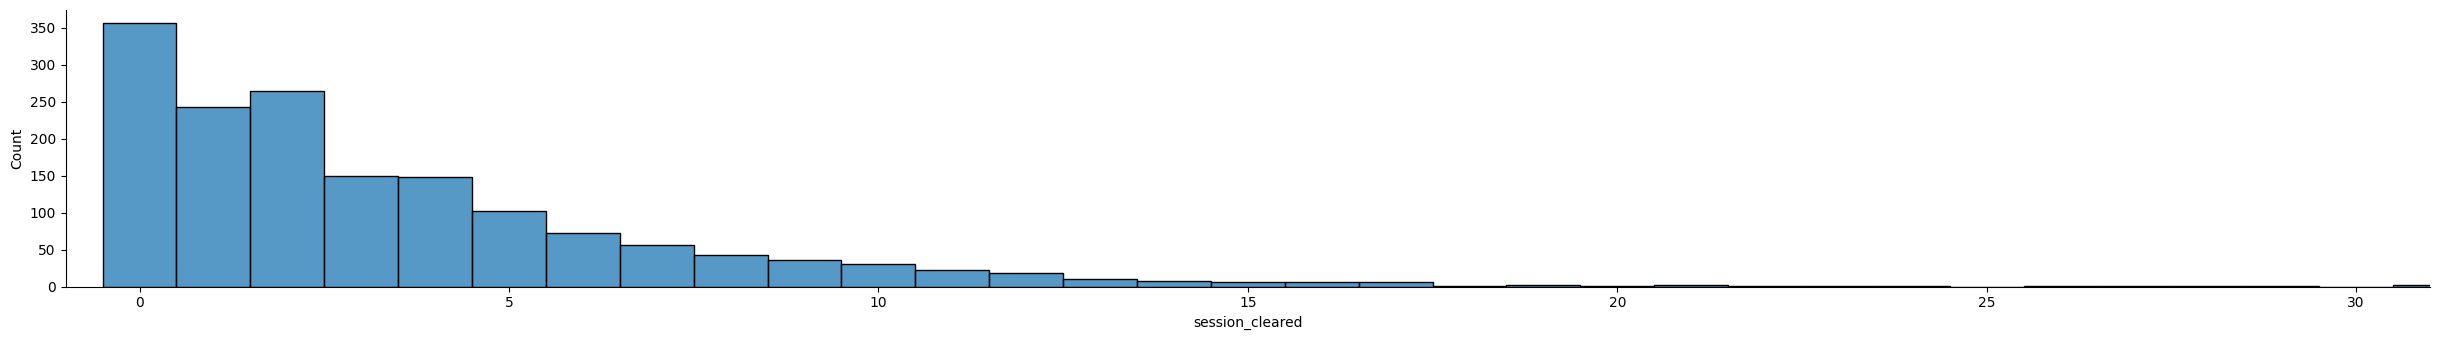

In [ ]:
g = sns.displot(data = dd, x = 'session_cleared', bins = 50, height = 3.5, aspect = 7, discrete=True)
plt.xlim([-1, 31]);

# Learning curves

Each line depicts the learning curve of a single subject. `session_mean` indicates the average number of points collected by the subject on each level attempt. Note that for a target of size $n$, the subject earns $n^2$ points. The black dashed line indicates the threshold of reward needed to pass the level.

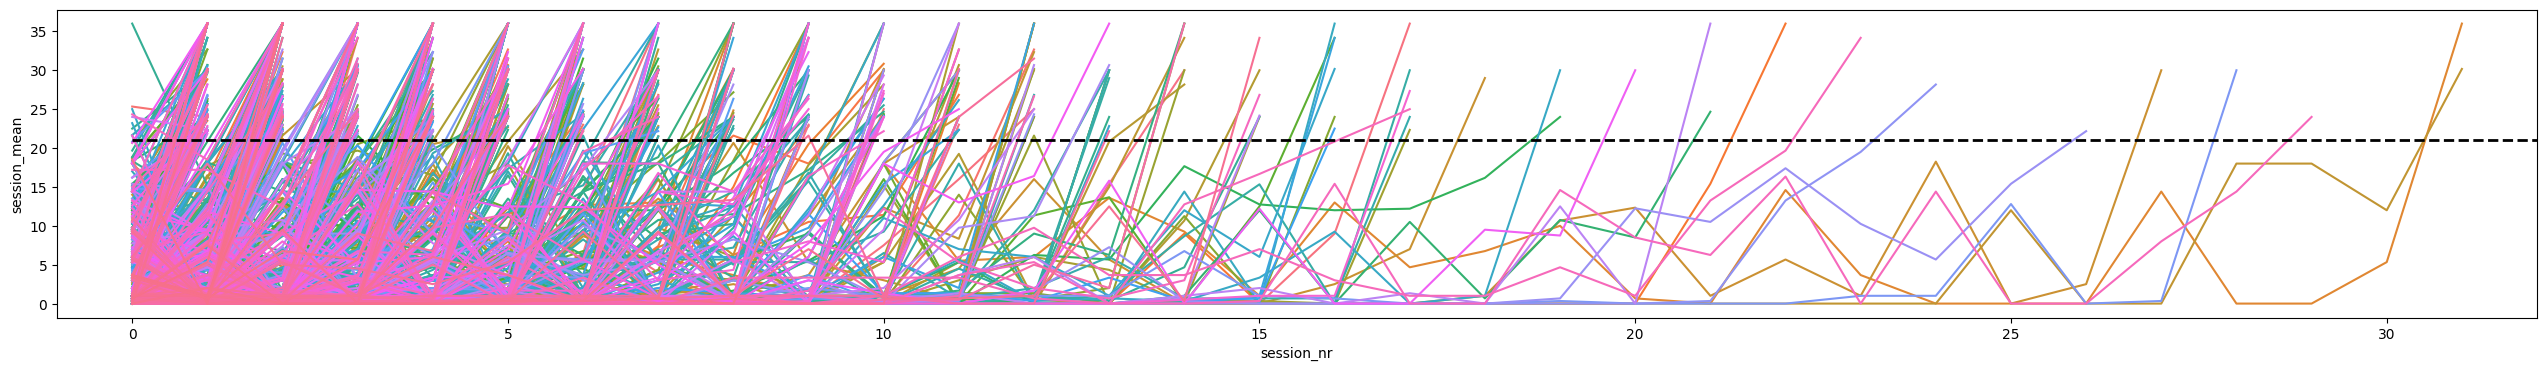

In [ ]:
fig = plt.subplots(figsize=(32, 4));

winners_only['session_mean'] = winners_only['session_score']/winners_only['sw_number']

ax = sns.lineplot(data = winners_only, x = 'session_nr', y = 'session_mean', hue = 'device_ID', legend = False);
ax.hlines(y=21, ls='--', lw=2, xmin = 0, xmax = 35, color = 'black');

plt.xlim([-1, 32]);

# Plotting reward exploration

We now look at the distribution of rewards collected by all players who completed the first level.

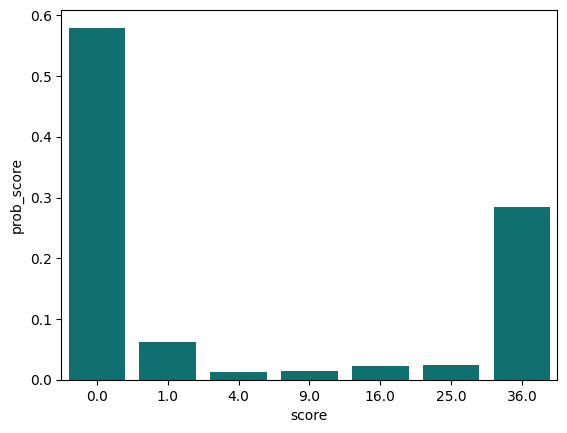

In [ ]:
rating_probs = df.groupby('score').size().div(len(df)).reset_index(name='prob_score');
sns.barplot(data=rating_probs, x='score',y='prob_score', color = 'teal');

# Plotting rewards given rewards in previous trials

The probability of collecting a reward on a puzzle attempt, conditioned on the reward collected on the previous attempt.

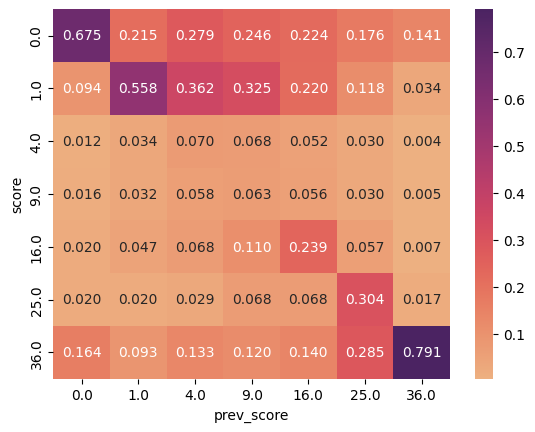

In [ ]:
learning_only = df.loc[df['learning'] == True]

score = learning_only.groupby(['device_ID','session_start','session_nr','sw_number'])['score'].last().reset_index(name='score')
score['prev_score'] = score['score'].shift(1)
score.loc[score['sw_number'] == 1.0, 'prev_score'] = pd.NA

ddd = pd.crosstab(score['score'], score['prev_score'], aggfunc=None, margins=False, margins_name='All', dropna=True, normalize='columns')
sns.heatmap(data = ddd, annot=True, fmt=".3f", cmap="flare");

# Plotting action exploration

We now look at the distribution of actions collected by all players who completed the first level.

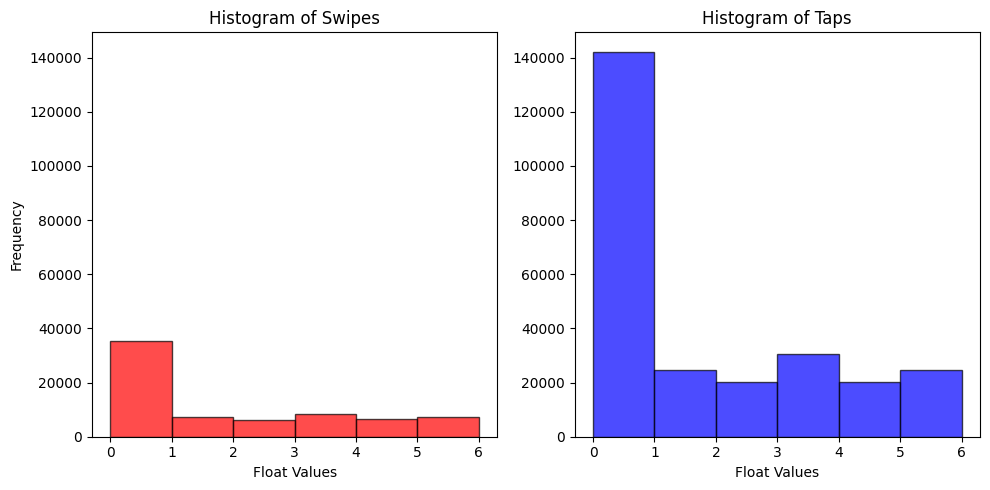

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt

sequences = df.groupby(['device_ID','session_start','sw_number']).last().reset_index()
overall_actions = [num for sequence in sequences.action_sequences for num in sequence]
overall_actions = np.array(overall_actions)

dfs = []

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # share the y-axis with the second subplot
plt.hist(-1*overall_actions[np.signbit(overall_actions)], bins=np.arange(7), color='red', edgecolor='black', alpha=0.7)
plt.title('Histogram of Swipes')
plt.xlabel('Float Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2, sharey=plt.gca())
plt.hist(overall_actions[~np.signbit(overall_actions)], bins=np.arange(7), color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Taps')
plt.xlabel('Float Values')

plt.tight_layout()
plt.show()

# Class data

Import data collected from the class in lab 1.

In [ ]:
import pandas as pd
import requests
from io import BytesIO

url = 'https://drive.google.com/uc?export=download&id=1L9JSwtlV6sXk3AY0YH_tiuSAXu4vIHLw'

r = requests.get(url) # Use requests to download the file
r.raise_for_status()  # Raises a HTTPError if the http request returned an unsuccessful status code.

# Read the content of the file into a pandas DataFrame
df_class = pd.read_parquet(BytesIO(r.content))

print(str(df_class['ID'].nunique()) + ' unique devices') # number of unique users
class_sessions = df_class.groupby(['ID','session_start']).last().reset_index()


22 unique devices


#Learning curves for class

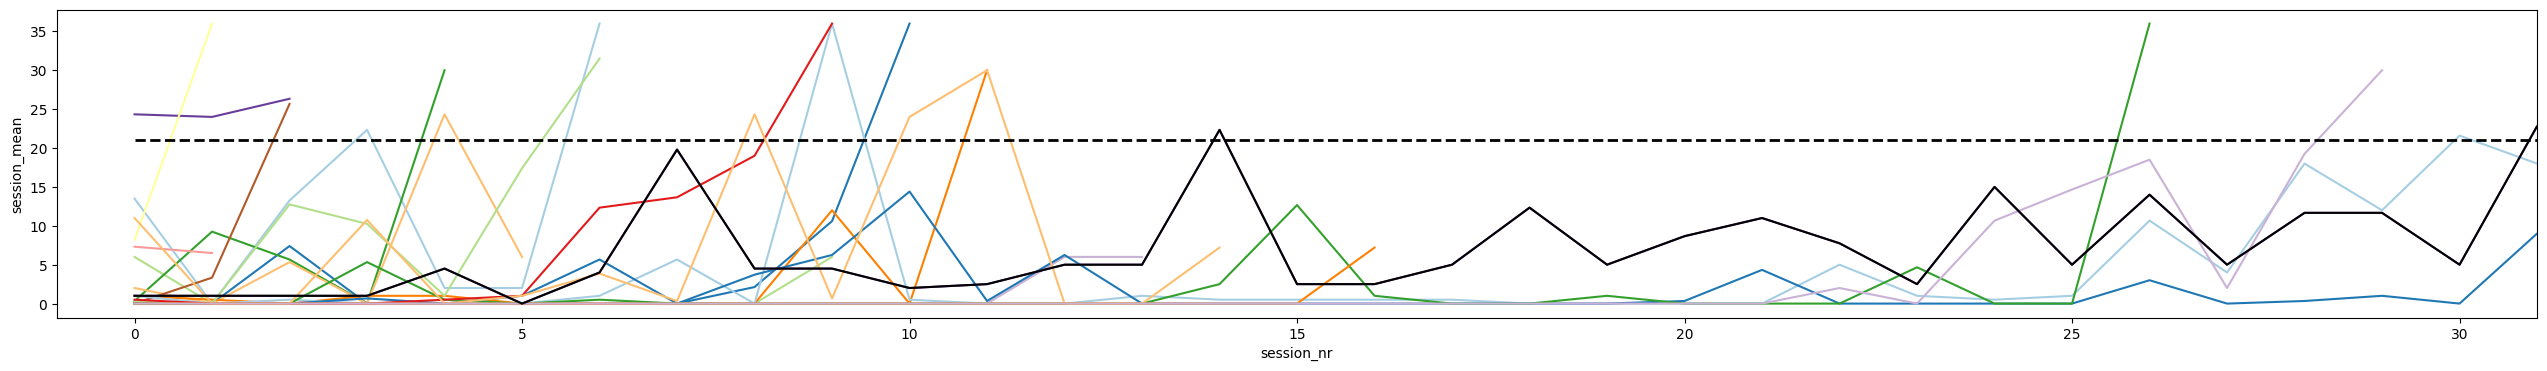

In [ ]:
your_IDs = ['1708473956_2009606787']


class_sessions['session_mean'] = class_sessions['session_score']/class_sessions['sw_number']

fig = plt.subplots(figsize=(32, 4))
#ax2 = ax.twinx()
ax = sns.lineplot(data = class_sessions, x = 'session_nr', y = 'session_mean', hue = 'ID', legend = False, palette = 'Paired')
for i in range(len(your_IDs)):
  sns.lineplot(data = class_sessions[class_sessions['ID'] == your_IDs[i]], x = 'session_nr', y = 'session_mean', color = 'black', legend = False)

ax.hlines(y=21, ls='--', lw=2, xmin = 0, xmax = 35, color = 'black');

plt.xlim([-1, 31]);
plt.show()

## Plotting reward exploration

We now look at the distribution of rewards collected by members of the class.

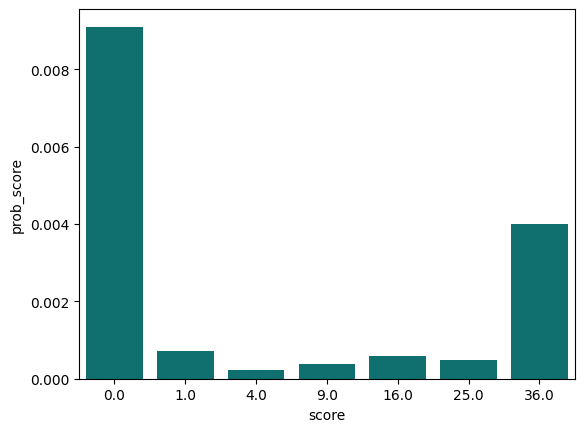

In [ ]:
rating_probs = df_class.groupby('score').size().div(len(df_class)).reset_index(name='prob_score')
sns.barplot(data=rating_probs, x='score',y='prob_score', color = 'teal');